In [152]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [153]:
def db_change(conn, table, column, new_value, rowid):
    cur = conn.cursor()
    query = 'update {} set {} = {} where rowid={}'.format(table, column, new_value, rowid)
    cur.execute(query)
    conn.commit()

def db_del_row(conn, table, rowid):
    cur = conn.cursor()
    query = "delete from {} where rowid={}".format(table, rowid)
    cur.execute(query)
    conn.commit()
    
def db_set_valid(conn, valid, rowid):
    cur = conn.cursor()
    query = 'update actors set valid = {} where rowid={}'.format(int(valid), rowid)
    cur.execute(query)
    conn.commit()
    
def db_all_valid():
    cur = conn.cursor()
    query = 'update actors set valid = 1'
    cur.execute(query)
    conn.commit()    

In [170]:
conn = sqlite3.connect("data.db")
# db_change(conn, table='actors', column='age', new_value='25', rowid=19)
# db_del_row(conn, table='actors', rowid=18)
# db_set_valid(conn, valid=False, rowid=1)
act = pd.read_sql_query("select rowid, * from actors where valid=1;", conn)
act[['tothitsexp0', 'tothitsexp1', 'tothitsexp2', 'tothits']]
n_hits = np.array(act[['tothitsexp0', 'tothitsexp1', 'tothitsexp2']])
keypress = np.array(act[['keydowns0', 'keydowns1', 'keydowns2']])
act

,rowid,age,gender,education,game,computer,eye,nickname,position,start,...,endexp1,endexp2,tothitsexp0,tothitsexp1,tothitsexp2,keydowns0,keydowns1,keydowns2,tothits,valid
0,2,30,0,6,1,0,0,FirstTestingTroll,7,1.525724e+09,...,1.525724e+09,1.525724e+09,6,9,21,81,99,226.0,36,1
1,3,24,0,4,2,0,3,Puch,7,1.525726e+09,...,1.525726e+09,1.525727e+09,10,9,20,169,146,218.0,39,1
2,4,25,0,4,2,0,3,the9ko,7,1.525727e+09,...,1.525727e+09,1.525727e+09,6,9,22,170,151,241.0,37,1
3,5,24,0,4,0,0,3,Gudleik+Knotten,7,1.525725e+09,...,1.525725e+09,1.525725e+09,10,14,20,146,184,208.0,44,1
4,6,25,0,4,3,0,2,smik,7,1.525726e+09,...,1.525726e+09,1.525726e+09,8,12,18,116,126,177.0,38,1
5,7,25,0,4,2,0,2,ElgElg,7,1.525727e+09,...,1.525728e+09,1.525728e+09,6,9,20,97,132,168.0,35,1
6,8,26,0,4,1,0,0,Birkeboii,7,1.525730e+09,...,1.525730e+09,1.525730e+09,6,9,21,138,144,229.0,36,1
7,9,27,0,5,3,0,0,,7,1.525733e+09,...,1.525733e+09,1.525734e+09,8,9,19,115,102,214.0,36,1
8,10,23,1,4,2,0,0,katt97,7,1.525734e+09,...,1.525734e+09,1.525735e+09,6,5,11,87,98,189.0,22,1
9,11,24,1,4,2,0,0,am,7,1.525735e+09,...,1.525736e+09,1.525735e+09,8,8,18,125,120,225.0,34,1


In [155]:
def exp_format(x, pos=None):
    names = {1: 'Delay',
            2: 'Delay + predictor',
            3: 'No delay'}
    return names[x]

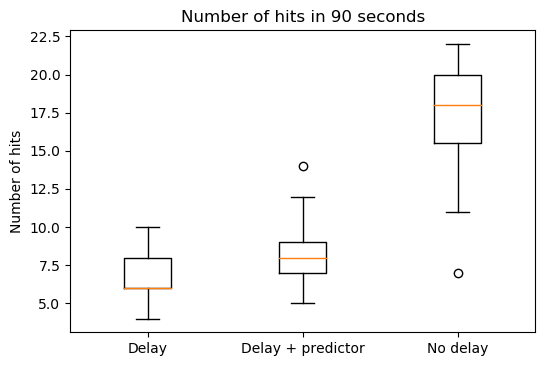

In [156]:
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Number of hits in 90 seconds')
ax1.boxplot(n_hits)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
# plt.xlabel('Experiment')
plt.ylabel('Number of hits')
plt.show()

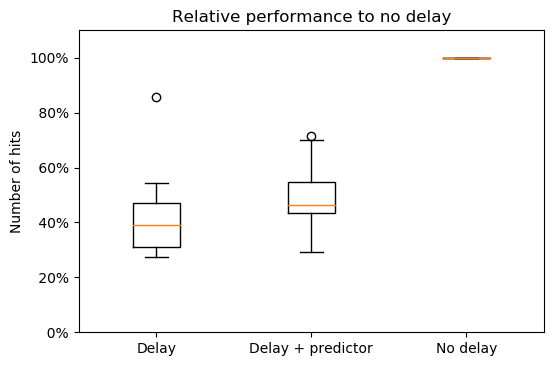

In [173]:
rel = n_hits.astype(float)
for row in rel:
    row[0]=row[0]/row[2]
    row[1]=row[1]/row[2]
    row[2]=row[2]/row[2]

fig, ax = plt.subplots(dpi=100)
ax.set_title('Relative performance to no delay')
ax.boxplot(rel)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
ax.set_ylim([0,1.1])
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
plt.ylabel('Number of hits')
plt.show()

c:\users\martin\envs\jupyter\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
c:\users\martin\envs\jupyter\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
c:\users\martin\envs\jupyter\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
c:\users\martin\envs\jupyter\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
c:\users\martin\envs\jupyter\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


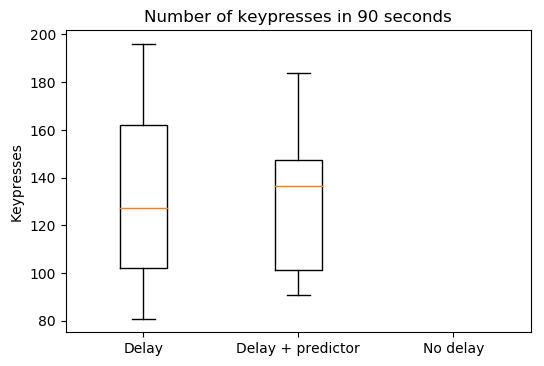

In [158]:
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title('Number of keypresses in 90 seconds')
ax1.boxplot(keypress)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
# plt.xlabel('Experiment')
plt.ylabel('Keypresses')
plt.show()

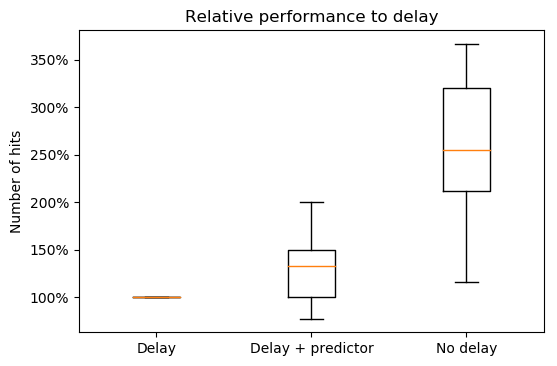

In [182]:
rel = n_hits.astype(float)
for row in rel:
    de = row[0]
    row[0]/=de
    row[1]/=de
    row[2]/=de

fig, ax = plt.subplots(dpi=100)
ax.set_title('Relative performance to delay')
ax.boxplot(rel)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(exp_format))
# ax.set_ylim([0,1.1])
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
plt.ylabel('Number of hits')
plt.show()